In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf 
from datetime import datetime

# 1. Data Collection

In [2]:
now=datetime.now()

start= datetime(now.year-10, now.month, now.day)
end=now
ticker='AAPL'
df=yf.download(ticker, start, end)
df

C:\Users\Ayon\AppData\Local\Temp\ipykernel_17092\4276809628.py:6: FutureWarning: YF.download() has changed argument auto_adjust default to True
  df=yf.download(ticker, start, end)
[*********************100%***********************]  1 of 1 completed


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-12-14,25.360744,25.405838,24.754233,25.293103,257274800
2015-12-15,24.912058,25.432892,24.880492,25.238989,213292400
2015-12-16,25.103710,25.250265,24.531021,25.042834,224954000
2015-12-17,24.571604,25.308886,24.571604,25.257028,179091200
2015-12-18,23.906464,24.693349,23.856860,24.555815,385813200
...,...,...,...,...,...
2025-12-05,278.779999,281.140015,278.049988,280.540009,47265800
2025-12-08,277.890015,279.670013,276.149994,278.130005,38211800


# 2. Data Exploration and Visualization  

In [3]:
type(df)

pandas.core.frame.DataFrame

In [4]:
df.shape

(2514, 5)

In [5]:
df.describe()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
count,2514.000000,2514.000000,2514.000000,2514.000000,2.514000e+03
mean,113.004303,114.128644,111.764540,112.893249,1.024553e+08
std,72.728772,73.426539,71.951042,72.646900,5.830110e+07
min,20.604076,20.907414,20.405654,20.526533,2.013560e+07
25%,41.298532,41.553420,40.903574,41.205342,6.235660e+07
50%,118.723335,120.457207,117.271569,118.921796,8.911260e+07
75%,171.248993,172.327613,169.206266,170.858193,1.249462e+08
max,286.190002,288.619995,283.299988,286.200012,5.334788e+08


In [6]:
df.dtypes

Price   Ticker
Close   AAPL      float64
High    AAPL      float64
Low     AAPL      float64
Open    AAPL      float64
Volume  AAPL        int64
dtype: object

In [7]:
df.tail()

Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2025-12-05,278.779999,281.140015,278.049988,280.540009,47265800
2025-12-08,277.890015,279.670013,276.149994,278.130005,38211800
2025-12-09,277.179993,280.029999,276.920013,278.160004,32193300
2025-12-10,278.779999,279.750000,276.440002,277.750000,33038300
2025-12-11,278.029999,279.579987,273.809998,279.095001,30285187


In [8]:
df.head()


Price,Close,High,Low,Open,Volume
Ticker,AAPL,AAPL,AAPL,AAPL,AAPL
Date,,,,,
2015-12-14,25.360744,25.405838,24.754233,25.293103,257274800
2015-12-15,24.912058,25.432892,24.880492,25.238989,213292400
2015-12-16,25.103710,25.250265,24.531021,25.042834,224954000
2015-12-17,24.571604,25.308886,24.571604,25.257028,179091200
2015-12-18,23.906464,24.693349,23.856860,24.555815,385813200


In [9]:
df=df.reset_index()

In [10]:
df.head()

Price,Date,Close,High,Low,Open,Volume
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL
0,2015-12-14,25.360744,25.405838,24.754233,25.293103,257274800
1,2015-12-15,24.912058,25.432892,24.880492,25.238989,213292400
2,2015-12-16,25.103710,25.250265,24.531021,25.042834,224954000
3,2015-12-17,24.571604,25.308886,24.571604,25.257028,179091200
4,2015-12-18,23.906464,24.693349,23.856860,24.555815,385813200


Text(0, 0.5, 'Close Price')

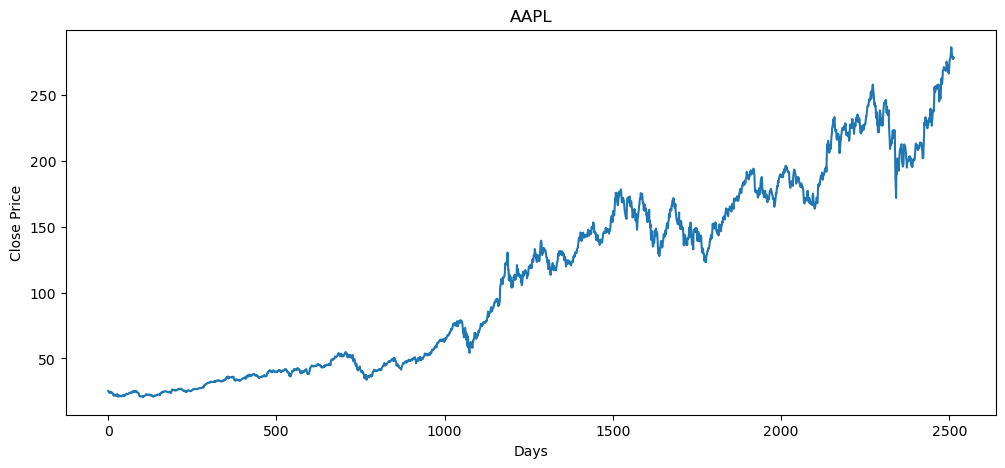

In [11]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.title(ticker)
plt.xlabel('Days')
plt.ylabel('Close Price')

# 3. Feature Engineering

# 100 days Moving Average 

In [12]:
df['MA_100']=df.Close.rolling(100).mean()
df.head()

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-12-14,25.360744,25.405838,24.754233,25.293103,257274800,NaN
1,2015-12-15,24.912058,25.432892,24.880492,25.238989,213292400,NaN
2,2015-12-16,25.103710,25.250265,24.531021,25.042834,224954000,NaN
3,2015-12-17,24.571604,25.308886,24.571604,25.257028,179091200,NaN
4,2015-12-18,23.906464,24.693349,23.856860,24.555815,385813200,NaN


In [13]:
df.head(103)

Price,Date,Close,High,Low,Open,Volume,MA_100
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,
0,2015-12-14,25.360744,25.405838,24.754233,25.293103,257274800,NaN
1,2015-12-15,24.912058,25.432892,24.880492,25.238989,213292400,NaN
2,2015-12-16,25.103710,25.250265,24.531021,25.042834,224954000,NaN
3,2015-12-17,24.571604,25.308886,24.571604,25.257028,179091200,NaN
4,2015-12-18,23.906464,24.693349,23.856860,24.555815,385813200,NaN
...,...,...,...,...,...,...,...
98,2016-05-05,21.265486,21.454786,21.137766,21.438821,143562000,NaN
99,2016-05-06,21.146891,21.313383,20.948467,21.295138,174799600,23.077277
100,2016-05-09,21.162855,21.386365,21.117240,21.210750,131745600,23.035298


Text(0, 0.5, 'Price')

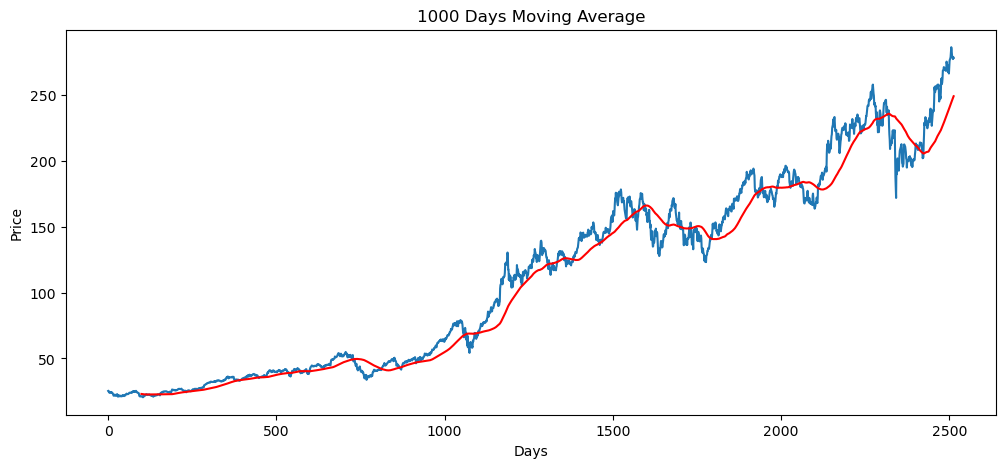

In [14]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'] ,'r')
plt.title('1000 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

# 200 days moving average 

In [15]:
df['MA_200']=df.Close.rolling(200).mean()
df.head(203)

Price,Date,Close,High,Low,Open,Volume,MA_100,MA_200
Ticker,,AAPL,AAPL,AAPL,AAPL,AAPL,,
0,2015-12-14,25.360744,25.405838,24.754233,25.293103,257274800,NaN,NaN
1,2015-12-15,24.912058,25.432892,24.880492,25.238989,213292400,NaN,NaN
2,2015-12-16,25.103710,25.250265,24.531021,25.042834,224954000,NaN,NaN
3,2015-12-17,24.571604,25.308886,24.571604,25.257028,179091200,NaN,NaN
4,2015-12-18,23.906464,24.693349,23.856860,24.555815,385813200,NaN,NaN
...,...,...,...,...,...,...,...,...
198,2016-09-27,25.932453,25.953092,25.760472,25.911816,98429600,23.269414,NaN
199,2016-09-28,26.129662,26.287885,26.010422,26.070043,118564400,23.319242,23.198259
200,2016-09-29,25.723783,26.095263,25.636647,25.948506,143548000,23.364851,23.200074


Text(0, 0.5, 'Price')

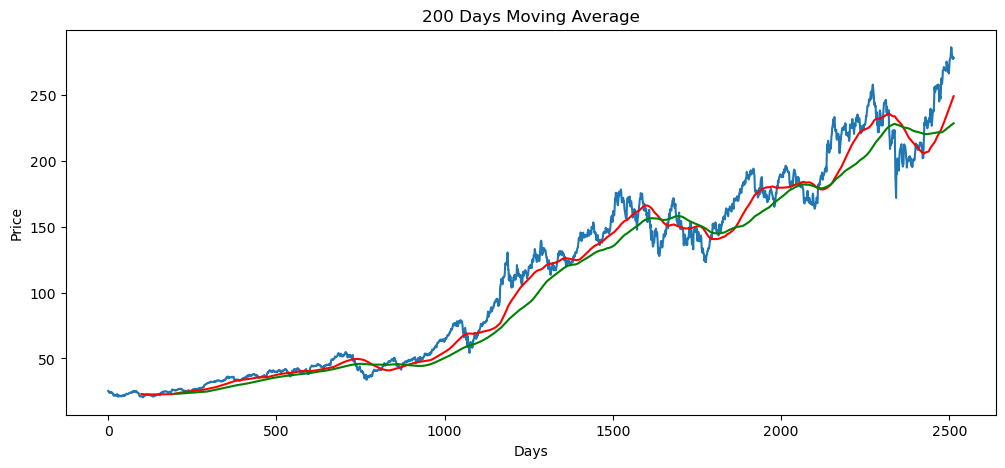

In [16]:
plt.figure(figsize=(12,5))
plt.plot(df.Close)
plt.plot(df['MA_100'] ,'r')
plt.plot(df['MA_200'] ,'g')
plt.title('200 Days Moving Average')
plt.xlabel('Days')
plt.ylabel('Price')

# Calculating % changed in each trading session

In [17]:
df['Percentage Changed']= df.Close.pct_change()
df[['Close','Percentage Changed']]

Price,Close,Percentage Changed
Ticker,AAPL,
0,25.360744,NaN
1,24.912058,-0.017692
2,25.103710,0.007693
3,24.571604,-0.021196
4,23.906464,-0.027069
...,...,...
2509,278.779999,-0.006840
2510,277.890015,-0.003192
2511,277.179993,-0.002555


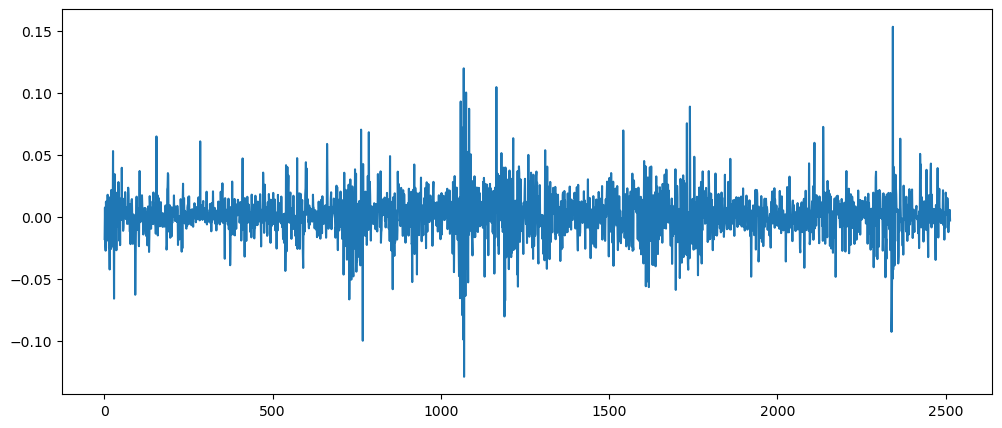

In [18]:
plt.figure(figsize=(12,5))
plt.plot(df['Percentage Changed'])

In [19]:
import sys
print(sys.executable)


C:\Users\Ayon\miniconda3\envs\stockenv\python.exe


# 4. Data Preprocessing

In [20]:
# Splitting data into training & testing datasets
data_training=pd.DataFrame(df.Close[0:int(len(df)*0.7)])
data_testing=pd.DataFrame(df.Close[int(len(df)*0.7):int(len(df))])  

print(data_training)
print(data_testing)

Ticker        AAPL
0        25.360744
1        24.912058
2        25.103710
3        24.571604
4        23.906464
...            ...
1754    146.105789
1755    145.613266
1756    144.450821
1757    140.786041
1758    138.845383

[1759 rows x 1 columns]
Ticker        AAPL
1759    140.529953
1760    140.047226
1761    142.342575
1762    143.308029
1763    141.081635
...            ...
2509    278.779999
2510    277.890015
2511    277.179993
2512    278.779999
2513    278.029999

[755 rows x 1 columns]


In [21]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler(feature_range=(0,1))

In [22]:
data_training_array=scaler.fit_transform(data_training)
data_training_array

array([[0.03016922],
       [0.02732342],
       [0.02853898],
       ...,
       [0.78549941],
       [0.7622555 ],
       [0.74994685]], shape=(1759, 1))

In [23]:
type(data_training_array)

numpy.ndarray

# 5. Sequence Creation 

In [24]:
x_train=[]
y_train=[]

for i in range(100,data_training_array.shape[0]):
    x_train.append(data_training_array[i-100:i])
    y_train.append(data_training_array[i,0])


x_train,y_train=np.array(x_train),np.array(y_train)

In [25]:
x_train

array([[[0.03016922],
        [0.02732342],
        [0.02853898],
        ...,
        [0.00474469],
        [0.004195  ],
        [0.00344281]],

       [[0.02732342],
        [0.02853898],
        [0.02516409],
        ...,
        [0.004195  ],
        [0.00344281],
        [0.00354406]],

       [[0.02853898],
        [0.02516409],
        [0.02094543],
        ...,
        [0.00344281],
        [0.00354406],
        [0.00445537]],

       ...,

       [[0.79417478],
        [0.80476463],
        [0.78545392],
        ...,
        [0.79424659],
        [0.79599606],
        [0.79287223]],

       [[0.80476463],
        [0.78545392],
        [0.80993486],
        ...,
        [0.79599606],
        [0.79287223],
        [0.78549941]],

       [[0.78545392],
        [0.80993486],
        [0.82264253],
        ...,
        [0.79287223],
        [0.78549941],
        [0.7622555 ]]], shape=(1659, 100, 1))

In [26]:
x_train.ndim

3

In [27]:
y_train.ndim

1

In [28]:
x_train.shape

(1659, 100, 1)

In [29]:
y_train.shape

(1659,)

# 6. Model Training 

In [30]:
import sys
print(sys.version)

3.11.14 | packaged by Anaconda, Inc. | (main, Oct 21 2025, 18:30:03) [MSC v.1929 64 bit (AMD64)]


In [32]:
import tensorflow as tf
print(tf.__version__)

2.20.0


In [35]:
# ML Model
from keras.models import Sequential
from keras.layers import Dense,LSTM,Input

In [36]:
model=Sequential()

model.add(Input(shape=(100,1)))
model.add(LSTM(units=128,activation='tanh',return_sequences=True))
model.add(LSTM(units=64))
model.add(Dense(25))
model.add(Dense(1))

# 7. Model training 

In [37]:
model.compile(optimizer='adam',loss='mean_squared_error')
model.fit(x_train,y_train,epochs=50)

Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 7s 73ms/step - loss: 0.0164
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 6.4684e-04
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 6.0586e-04
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 5.7051e-04
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 5.6083e-04
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 5.5441e-04
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 5.7693e-04
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 5.1038e-04
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 6.1348e-04
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - loss: 4.7294e-04
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 4.7833e-04
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 4.6292e-04
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 4.5391e-04
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 4s 74ms/step - loss: 4.1044e-04
Epoch 15/50
52/52 ━

In [38]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm (LSTM)                          │ (None, 100, 128)            │          66,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_1 (LSTM)                        │ (None, 64)                  │          49,408 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 25)                  │           1,625 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 352,859 (1.35 MB)

 Trainable params: 117,619 (459.45 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 235,240 (918.91 KB)

In [41]:
# Save the trained model 
model.save('stock_prediction_model.keras') 

# 8. Preparing Test Data

In [44]:
data_training.tail(100)

Ticker,AAPL
1659,148.303467
1660,150.307037
1661,152.575790
1662,151.338303
1663,150.218674
...,...
1754,146.105789
1755,145.613266
1756,144.450821
1757,140.786041


In [45]:
data_testing

Ticker,AAPL
1759,140.529953
1760,140.047226
1761,142.342575
1762,143.308029
1763,141.081635
...,...
2509,278.779999
2510,277.890015
2511,277.179993
2512,278.779999


In [46]:
past_100_days=data_training.tail(100)
past_100_days

Ticker,AAPL
1659,148.303467
1660,150.307037
1661,152.575790
1662,151.338303
1663,150.218674
...,...
1754,146.105789
1755,145.613266
1756,144.450821
1757,140.786041


In [48]:
final_df=pd.concat([past_100_days,data_testing],ignore_index=True)
final_df

Ticker,AAPL
0,148.303467
1,150.307037
2,152.575790
3,151.338303
4,150.218674
...,...
850,278.779999
851,277.890015
852,277.179993
853,278.779999


In [49]:
input_data=scaler.fit_transform(final_df)
input_data

array([[1.54215819e-01],
       [1.66505549e-01],
       [1.80421885e-01],
       [1.72831241e-01],
       [1.65963534e-01],
       [1.57830407e-01],
       [1.89097121e-01],
       [1.92470699e-01],
       [2.23556398e-01],
       [2.17532272e-01],
       [2.08495288e-01],
       [2.45364758e-01],
       [2.43436772e-01],
       [2.42049491e-01],
       [2.39153440e-01],
       [2.39455381e-01],
       [2.65516842e-01],
       [2.60992312e-01],
       [2.82770254e-01],
       [2.89346129e-01],
       [2.88380872e-01],
       [2.97550670e-01],
       [2.95137481e-01],
       [2.79271257e-01],
       [2.55442064e-01],
       [2.53390811e-01],
       [2.55200679e-01],
       [2.70282662e-01],
       [2.31612683e-01],
       [2.18099277e-01],
       [2.03198591e-01],
       [1.93003261e-01],
       [1.97467327e-01],
       [1.84497060e-01],
       [1.76774820e-01],
       [1.85401853e-01],
       [1.76352608e-01],
       [1.93907961e-01],
       [2.30466411e-01],
       [1.72612414e-01],


In [50]:
input_data.shape

(855, 1)

In [51]:
x_test=[]
y_test=[]

for i in range(100,input_data.shape[0]):
    x_test.append(input_data[i-100:i])
    y_test.append(input_data[i,0])

x_test,y_test=np.array(x_test),np.array(y_test)

In [52]:
x_test

array([[[0.15421582],
        [0.16650555],
        [0.18042189],
        ...,
        [0.13058402],
        [0.10810458],
        [0.09620074]],

       [[0.16650555],
        [0.18042189],
        [0.17283124],
        ...,
        [0.10810458],
        [0.09620074],
        [0.10653375]],

       [[0.18042189],
        [0.17283124],
        [0.16596353],
        ...,
        [0.09620074],
        [0.10653375],
        [0.10357275]],

       ...,

       [[0.53717354],
        [0.54513089],
        [0.5568832 ],
        ...,
        [0.96632487],
        [0.95454767],
        [0.94908859]],

       [[0.54513089],
        [0.5568832 ],
        [0.55535299],
        ...,
        [0.95454767],
        [0.94908859],
        [0.94473337]],

       [[0.5568832 ],
        [0.55535299],
        [0.55296582],
        ...,
        [0.94908859],
        [0.94473337],
        [0.95454767]]], shape=(755, 100, 1))

In [53]:
y_test

array([1.06533752e-01, 1.03572746e-01, 1.17652220e-01, 1.23574233e-01,
       1.09917719e-01, 6.93707642e-02, 5.73457240e-02, 4.44140184e-02,
       4.39911512e-02, 6.30258843e-02, 4.35680033e-02, 4.13323667e-02,
       3.02740807e-02, 6.16344379e-03, 2.77360820e-02, 2.96698711e-02,
       3.02081423e-04, 8.09723287e-03, 0.00000000e+00, 2.77964047e-02,
       3.09991698e-02, 3.45039694e-02, 5.11819526e-02, 5.06985288e-02,
       5.88563651e-02, 6.59867035e-02, 6.15755191e-02, 6.19382040e-02,
       7.76492459e-02, 9.72279595e-02, 1.05808569e-01, 1.01759883e-01,
       1.14449830e-01, 1.26353850e-01, 1.08648556e-01, 1.16443614e-01,
       1.23332381e-01, 1.55902795e-01, 1.78140200e-01, 1.61401660e-01,
       1.79046678e-01, 1.62549897e-01, 1.56205110e-01, 1.58444304e-01,
       1.75632105e-01, 1.71698073e-01, 1.84588877e-01, 1.74784779e-01,
       1.67764510e-01, 1.43132823e-01, 1.45735170e-01, 1.48700481e-01,
       1.32420937e-01, 1.39743615e-01, 1.36657190e-01, 1.23947869e-01,
      

# 9. Making Predictions

In [54]:
y_predicted=model.predict(x_test)
y_predicted

24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 41ms/step


array([[0.12182461],
       [0.11568534],
       [0.1114889 ],
       [0.11239879],
       [0.11651853],
       [0.11765023],
       [0.10773486],
       [0.09333021],
       [0.07776861],
       [0.06530294],
       [0.06098269],
       [0.05669925],
       [0.05291241],
       [0.04783227],
       [0.03829744],
       [0.03348727],
       [0.03206908],
       [0.02627689],
       [0.02145143],
       [0.01643641],
       [0.01796142],
       [0.02264813],
       [0.02837422],
       [0.03680979],
       [0.04448359],
       [0.05187833],
       [0.05906116],
       [0.06353763],
       [0.06593816],
       [0.07044066],
       [0.07921596],
       [0.08973927],
       [0.09759753],
       [0.1055418 ],
       [0.11448302],
       [0.11736131],
       [0.1190659 ],
       [0.12154277],
       [0.13172147],
       [0.14810802],
       [0.15862355],
       [0.16882534],
       [0.1718398 ],
       [0.16967677],
       [0.16668071],
       [0.1685832 ],
       [0.17078955],
       [0.176

In [55]:
y_test

array([1.06533752e-01, 1.03572746e-01, 1.17652220e-01, 1.23574233e-01,
       1.09917719e-01, 6.93707642e-02, 5.73457240e-02, 4.44140184e-02,
       4.39911512e-02, 6.30258843e-02, 4.35680033e-02, 4.13323667e-02,
       3.02740807e-02, 6.16344379e-03, 2.77360820e-02, 2.96698711e-02,
       3.02081423e-04, 8.09723287e-03, 0.00000000e+00, 2.77964047e-02,
       3.09991698e-02, 3.45039694e-02, 5.11819526e-02, 5.06985288e-02,
       5.88563651e-02, 6.59867035e-02, 6.15755191e-02, 6.19382040e-02,
       7.76492459e-02, 9.72279595e-02, 1.05808569e-01, 1.01759883e-01,
       1.14449830e-01, 1.26353850e-01, 1.08648556e-01, 1.16443614e-01,
       1.23332381e-01, 1.55902795e-01, 1.78140200e-01, 1.61401660e-01,
       1.79046678e-01, 1.62549897e-01, 1.56205110e-01, 1.58444304e-01,
       1.75632105e-01, 1.71698073e-01, 1.84588877e-01, 1.74784779e-01,
       1.67764510e-01, 1.43132823e-01, 1.45735170e-01, 1.48700481e-01,
       1.32420937e-01, 1.39743615e-01, 1.36657190e-01, 1.23947869e-01,
      

In [56]:
y_predicted=scaler.inverse_transform(y_predicted.reshape(-1,1)).flatten()
y_test=scaler.inverse_transform(y_test.reshape(-1,1)).flatten()


In [57]:
y_predicted

array([143.0228 , 142.02191, 141.33778, 141.48611, 142.15776, 142.34224,
       140.72577, 138.3774 , 135.84042, 133.80818, 133.10385, 132.40553,
       131.78816, 130.95996, 129.40552, 128.62132, 128.39012, 127.44583,
       126.65914, 125.84155, 126.09018, 126.85425, 127.78776, 129.163  ,
       130.41403, 131.61958, 132.79059, 133.52039, 133.91173, 134.64577,
       136.07639, 137.79198, 139.0731 , 140.36824, 141.82591, 142.29515,
       142.57304, 142.97684, 144.63626, 147.30772, 149.02205, 150.68523,
       151.17667, 150.82404, 150.33559, 150.64575, 151.00545, 151.85832,
       152.25818, 152.09462, 150.7208 , 149.38562, 148.52763, 147.40094,
       146.7747 , 146.37245, 145.65187, 145.14496, 146.09343, 148.07472,
       149.40668, 150.47424, 150.56001, 149.70766, 149.21402, 149.50226,
       150.11206, 151.43466, 152.46841, 153.76393, 155.31349, 156.14711,
       156.78479, 157.52115, 157.54134, 157.12582, 157.51236, 158.51651,
       160.1927 , 162.024  , 163.25111, 163.36852, 

In [58]:
y_test

array([140.529953  , 140.04722595, 142.34257507, 143.30802917,
       141.08163452, 134.47134399, 132.51092529, 130.4026947 ,
       130.33375549, 133.43695068, 130.26477051, 129.90029907,
       128.0974884 , 124.16677856, 127.68372345, 127.99898529,
       123.21121216, 124.48204041, 123.16196442, 127.69355774,
       128.21569824, 128.78707886, 131.50605774, 131.42724609,
       132.75720215, 133.91964722, 133.20050049, 133.2596283 ,
       135.82096863, 139.0128479 , 140.41172791, 139.75167847,
       141.82049561, 143.76118469, 140.87472534, 142.14553833,
       143.26860046, 148.57849121, 152.20381165, 149.47496033,
       152.35159302, 149.66215515, 148.6277771 , 148.99282837,
       151.79492188, 151.15356445, 153.25512695, 151.65678406,
       150.51228333, 146.49662781, 146.92088318, 147.40431213,
       144.75028992, 145.9440918 , 145.44091797, 143.36894226,
       143.96096802, 149.01252747, 151.77516174, 149.57495117,
       150.82800293, 148.57844543, 146.51635742, 148.46

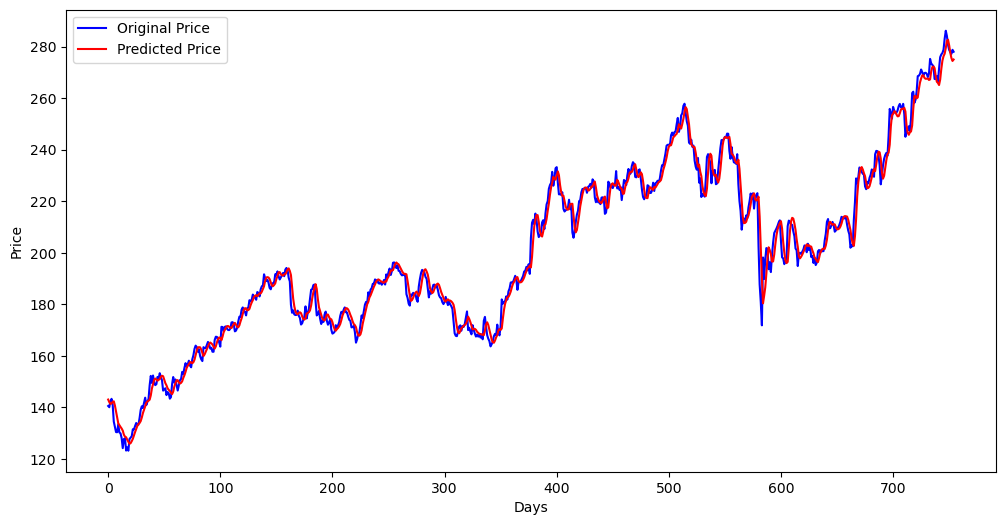

In [62]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted, 'r',label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()


(140.0, 220.0)

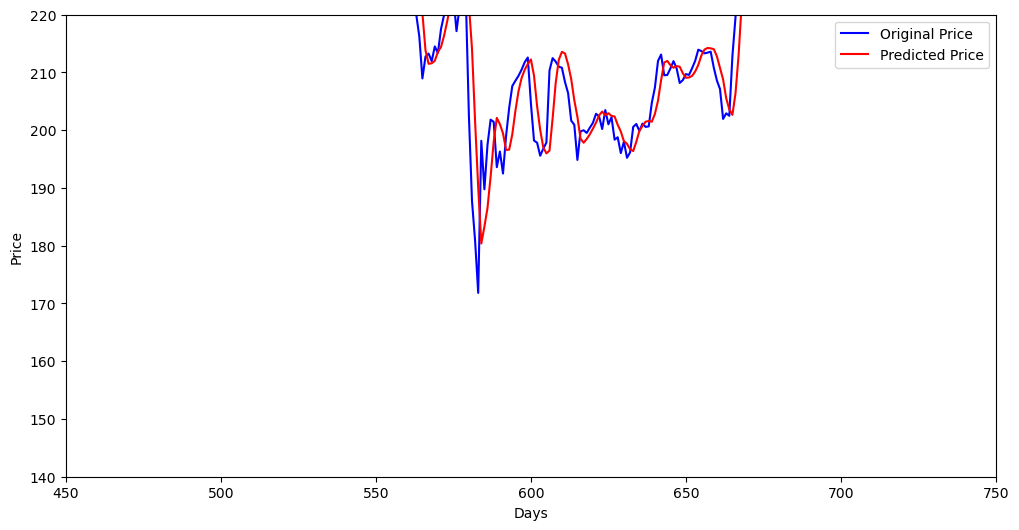

In [63]:
plt.figure(figsize=(12,6))
plt.plot(y_test,'b',label='Original Price')
plt.plot(y_predicted, 'r',label='Predicted Price')
plt.xlabel('Days')
plt.ylabel('Price')
plt.legend()
plt.xlim(450, 750)
plt.ylim(140, 220)

# 10. Model Evaluation 

In [71]:
# Mean Squared Error (MSE) 
from sklearn.metrics import mean_squared_error,r2_score

In [67]:
mse=mean_squared_error(y_test,y_predicted)
print(f"Mean Squared Error (MSE): {mse}") 

Mean Squared Error (MSE): 17.224112954467383


In [68]:
# Root Mean Squared Error (MSE) 

In [70]:
rmse=np.sqrt(mse)
print(f"Root Mean Squared Error (RMSE): {rmse}") 

Root Mean Squared Error (RMSE): 4.150194327313769


In [72]:
# R-Squared 
r2=r2_score(y_test,y_predicted)
print(f"R-Squared: {r2}") 

R-Squared: 0.9854788917028142
